In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

from torchsummary import summary

import matplotlib.pyplot as plt
from hydra import compose, initialize
from omegaconf import OmegaConf

from tqdm import tqdm
import random
import numpy as np

import matplotlib.patches as mpatches

In [2]:
from typing import List, Optional, Tuple

import torch
import hydra
import pyrootutils
import pytorch_lightning as pl
from omegaconf import DictConfig
from pytorch_lightning import (Callback, LightningDataModule, LightningModule,
                               Trainer)
from pytorch_lightning.loggers import TensorBoardLogger

# pyrootutils.setup_root(__file__, indicator=".project-root", pythonpath=True)

import src.utils.default as utils

log = utils.get_pylogger(__name__)

torch.set_float32_matmul_precision('medium')
# torch.autograd.set_detect_anomaly(True)

In [16]:
####### CHANGE
EXP_NAME = '112_augm_lsulci_1x/runs/2023-03-30_19-07-28'
CHKPT = '/mrhome/vladyslavz/git/central-sulcus-analysis/logs/sst-corrected-unet-allAugm/runs/2023-03-21_10-25-26/checkpoints/epoch-175_val_loss-0.011.ckpt'
####### CHANGE


logging_path = '/mrhome/vladyslavz/git/central-sulcus-analysis/sulci_segm_logs'

In [17]:
cfg = OmegaConf.load(f'{logging_path}/{EXP_NAME}/.hydra/config.yaml')

# log.info(f"Instantiating datamodule <{cfg.data._target_}>")
datamodule: LightningDataModule = hydra.utils.instantiate(cfg.data)

log.info(f"Instantiating model <{cfg.model._target_}>")
model: LightningModule = hydra.utils.instantiate(cfg.model)

2023-03-30 19:10:58,292 - Len of train examples 29 len of validation examples 7
2023-03-30 19:10:58,294 - Instantiating model <src.models.UNet3D.BasicUNet3D>


In [22]:
for batch in datamodule.train_dataloader():
    # print(batch)
    break

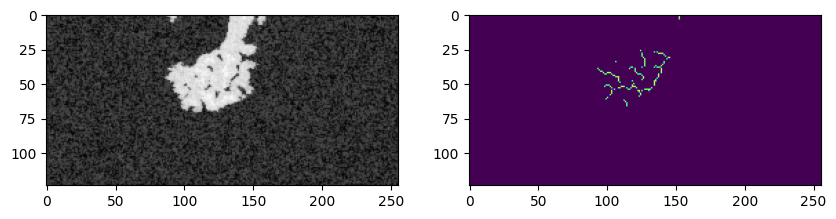

Image shape torch.Size([1, 1, 124, 256, 256])
Target shape torch.Size([1, 124, 256, 256])
Image type torch.float32, target type torch.int64,
    image min-max 0.0, 1.0,
        target min-max 0, 1
Target Labels tensor([0, 1])


In [23]:
# plot image
slice_num = 70

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(batch['image'][0, 0, :, :, slice_num].numpy(), cmap='gray')
ax[1].imshow(batch['target'][0, :, :, slice_num].numpy())
plt.show()
print('Image shape', batch['image'].shape)
print('Target shape', batch['target'].shape)
print(f"Image type {batch['image'].dtype}, target type {batch['target'].dtype},\n\
    image min-max {batch['image'].min()}, {batch['image'].max()},\n\
        target min-max {batch['target'].min()}, {batch['target'].max()}")
print('Target Labels', torch.unique(batch['target']))

In [11]:
target, inpt, __= model._on_step(batch, 1)

In [12]:
y.shape

torch.Size([1, 124, 256, 256])

In [13]:
y_hat.shape

torch.Size([1, 2, 124, 256, 256])

In [15]:
model.train_dsc(inpt, target)

tensor(0.0171)